In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def row_echelon(M):
    """ Return Row Echelon Form of matrix A """
    A = np.copy(M)
    if (issubclass(A.dtype.type, np.integer)):
        A = A.astype(float)
    #A = M.astype(float)
    # if matrix A has no columns or rows,
    # it is already in REF, so we return itself
    r, c = A.shape
    if r == 0 or c == 0:
        return A

    # we search for non-zero element in the first column
    for i in range(len(A)):
        if A[i,0] != 0:
            break
    else:
        # if all elements in the first column is zero,
        # we perform REF on matrix from second column
        B = row_echelon(A[:,1:])
        # and then add the first zero-column back
        return np.hstack([A[:,:1], B])

    # if non-zero element happens not in the first row,
    # we switch rows
    if i > 0:
        ith_row = A[i].copy()
        A[i] = A[0]
        A[0] = ith_row

    # we divide first row by first element in it
    A[0] = A[0] / A[0,0]
    # we subtract all subsequent rows with first row (it has 1 now as first element)
    # multiplied by the corresponding element in the first column
    A[1:] -= A[0] * A[1:,0:1]

    # we perform REF on matrix from second row, from second column
    B = row_echelon(A[1:,1:])

    # we add first row and first (zero) column, and return
    return np.vstack([A[:1], np.hstack([A[1:,:1], B]) ])

In [3]:
# ------------------------------- Ejercicio 2 -------------------------------

# Calculamos las coordenadas de (1,1,1) en B
v = np.array([1, 1, 1])
A = np.array([[1, 0, 1], 
             [2, 1, 2],
             [1, 2, 0]])
coordenadas = np.linalg.solve(A, v)
coordenadas

array([ 3., -1., -2.])

In [4]:
# ------------------------------- Ejercicio 3 -------------------------------

# Chequeamos que B sea base
A = np.array([[-1, 2, 0],
             [1, 1, 1],
             [2, 0 ,1]])
row_echelon(A)

array([[ 1.        , -2.        , -0.        ],
       [ 0.        ,  1.        ,  0.33333333],
       [ 0.        ,  0.        ,  1.        ]])

In [5]:
# Armamos la matriz asociada a f respecto a B
Mf = np.array([[1, -1, 0], [1, 2, 1]])

In [6]:
# Calculamos las coordenadas de (1,0,0) en B
coordenadas = np.linalg.solve(A.T, np.array([1, 0, 0]))
coordenadas

array([ 1., -2.,  2.])

In [7]:
# Calculamos f(1,0,0)
Mf @ coordenadas

array([ 3., -1.])

In [8]:
# ------------------------------- Ejercicio 4 -------------------------------

# Para calcular Nuf
Mf = np.array([[1, 0 ,1], 
               [-1, 1, -2], 
               [3, 2, 1]])
row_echelon(Mf)

array([[ 1.,  0.,  1.],
       [ 0.,  1., -1.],
       [ 0.,  0.,  0.]])

In [9]:
# ------------------------------- Visualizaciones de t.l. -------------------------------

# Una función que sirve para visualizar cómo una t.l. f: R2 → R2 transforma el cuadrado de lado 2 centrado en el origen.

plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['figure.dpi'] = 100

def plot_coords(f, v1, v2):
    w1 = f(v1)
    w2 = f(v2)
    return np.array([w1[0], w2[0]]), np.array([w1[1], w2[1]])

def ax_plot(axis, func=None):
    
    axis.axhline(0, color='k')
    axis.axvline(0, color='k')
    
    V = [np.array([1, 1]), np.array([1, -1]), np.array([-1, -1]), np.array([-1, 1])]
    
    if func is None:
        func = lambda v: v

    for i in range(3, -1, -1):
        xs, ys = plot_coords(func, V[i], V[i-1])
        axis.plot(xs, ys, 'k--', lw=2)
        
    for i in range(4):
        axis.plot(*func(V[i]), 'o', ms=30)

    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)
    axis.set_aspect('equal')
    xmax = max((func(v)[0] for v in V))
    ymax = max((func(v)[1] for v in V))
    axis_max = np.abs(max(xmax, ymax))
    axis.set_xlim([-axis_max*1.1, axis_max*1.1])
    axis.set_ylim([-axis_max*1.1, axis_max*1.1])
    axis.tick_params(axis='both', which='major', labelsize=15)

def square_plot(f):
    fig, axs = plt.subplots(1, 2)
    ax_plot(axs[0])
    ax_plot(axs[1], f)

- Aplicado a $f(x_1,x_2)=(x_2,x_1)$

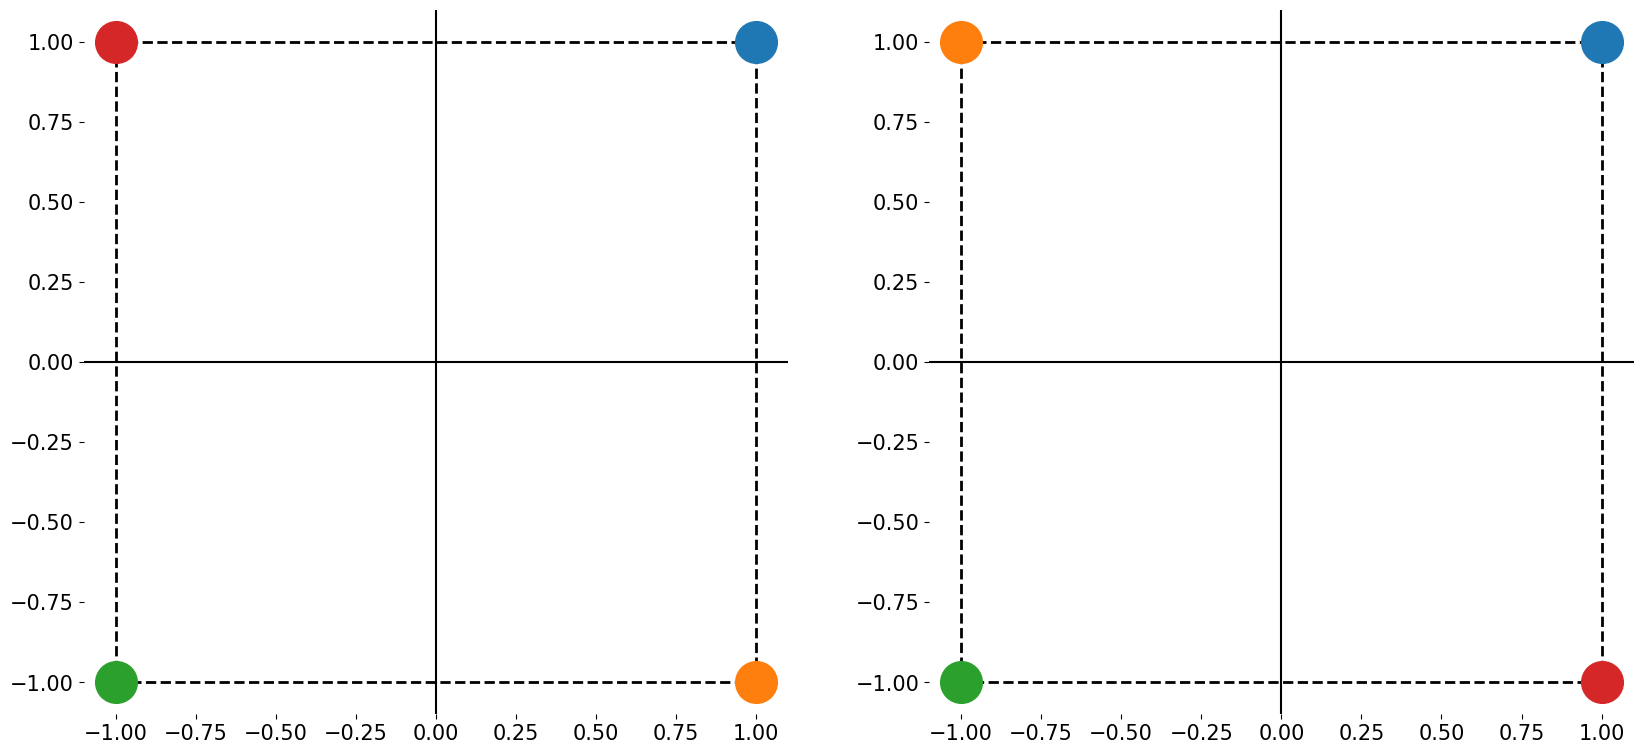

In [10]:
f = lambda x: (x[1], x[0])
square_plot(f)

- Aplicado a $f(x_1,x_2)=(2x_1,x_2)$

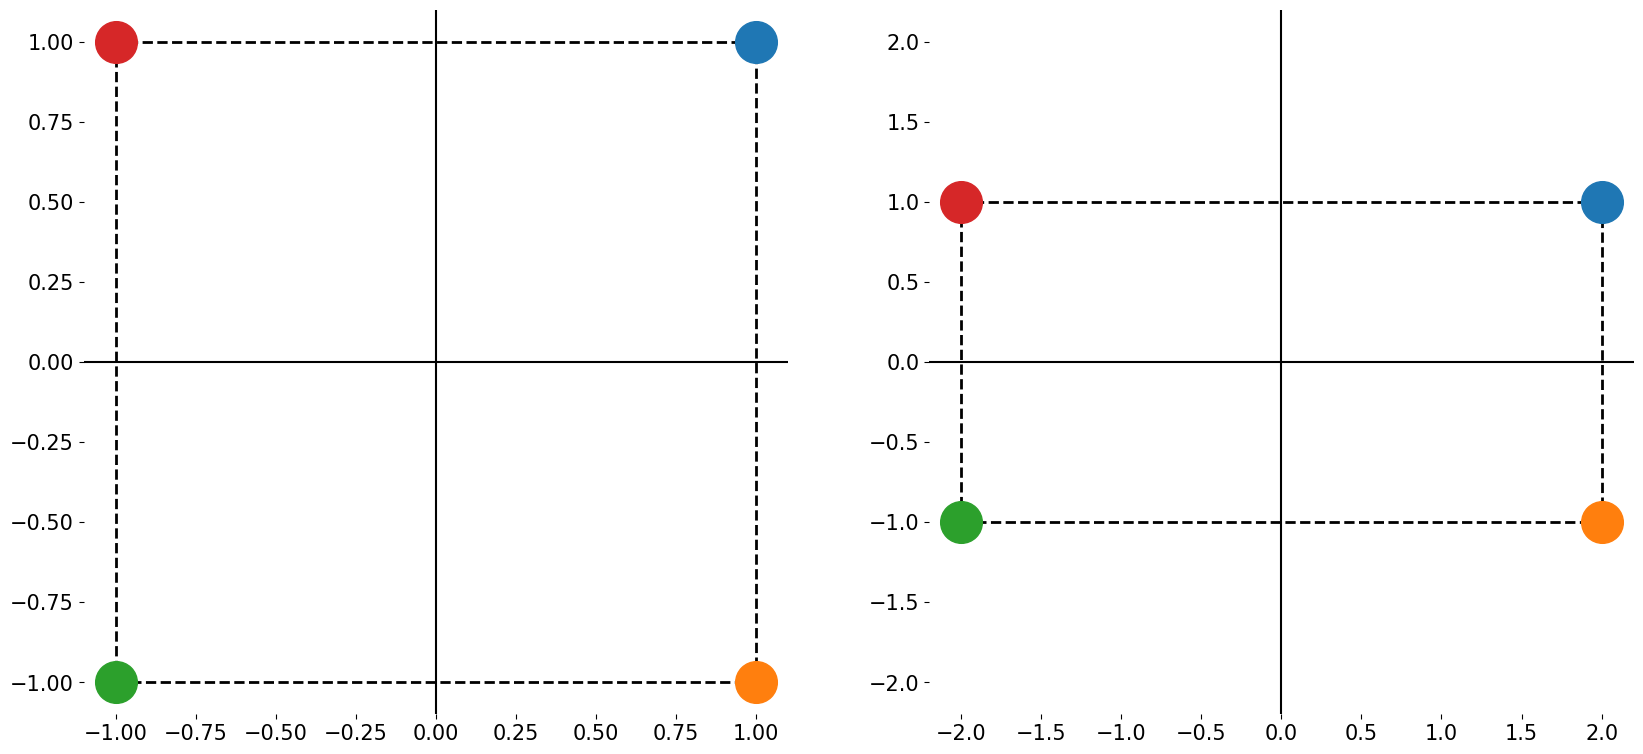

In [11]:
f = lambda x: np.array([2*x[0], x[1]])
square_plot(f)

- Aplicado a $f(x_1,x_2)=(x_1cos(\theta) - x_2sen(\theta), x_1sen(\theta) + x_2cos(\theta))$ con $\theta=\frac{1}{4}\pi$

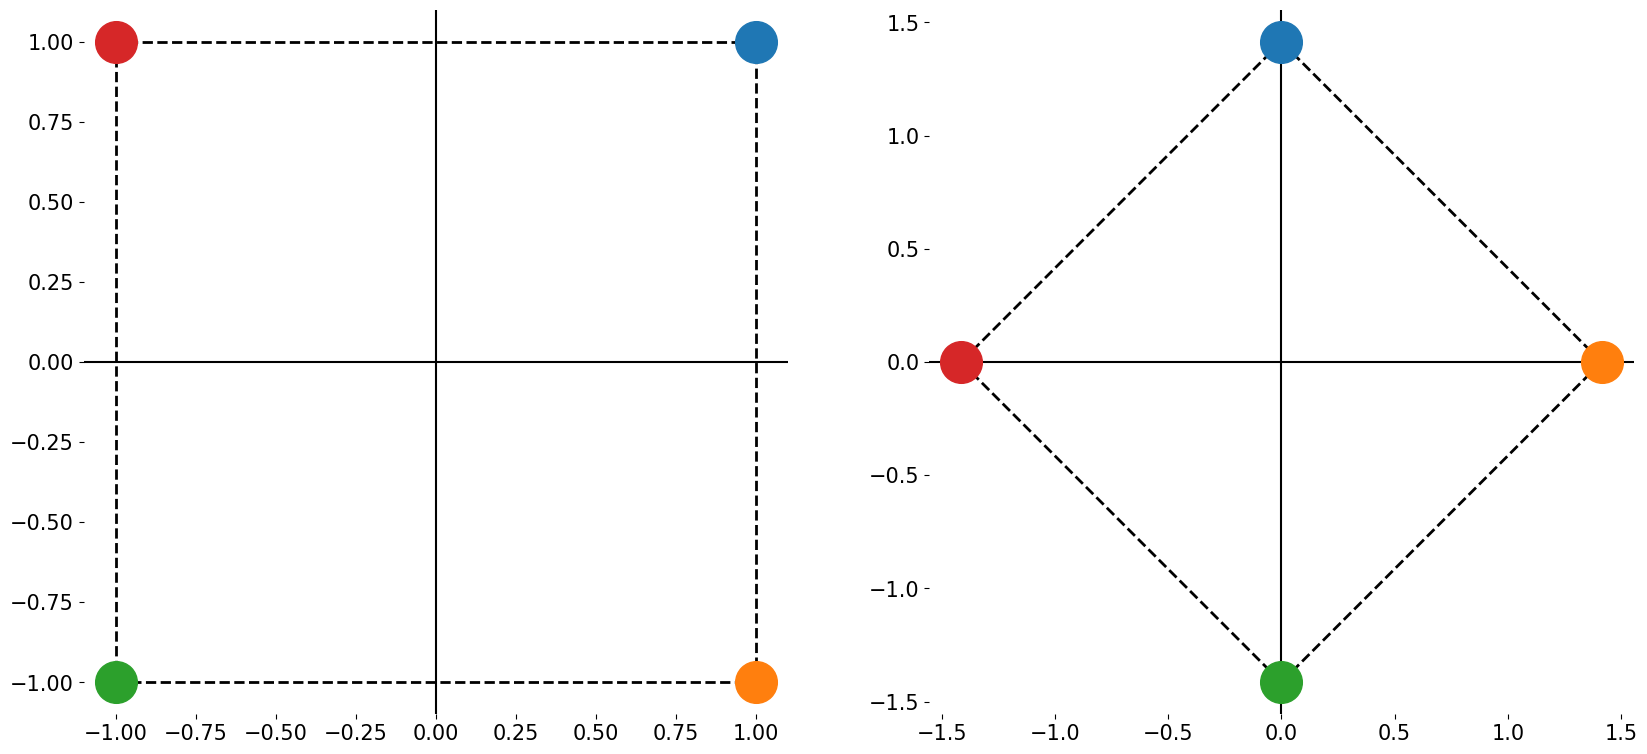

In [12]:
theta = 1/4*np.pi
f = lambda x: np.array([x[0]*np.cos(theta) - x[1]*np.sin(theta), x[0]*np.sin(theta) + x[1]*np.cos(theta)])
square_plot(f)

- Aplicado a $f(x_1,x_2)=(0.5x_1 + 0.5x_2, 0.5x_1 + 0.5x_2)$

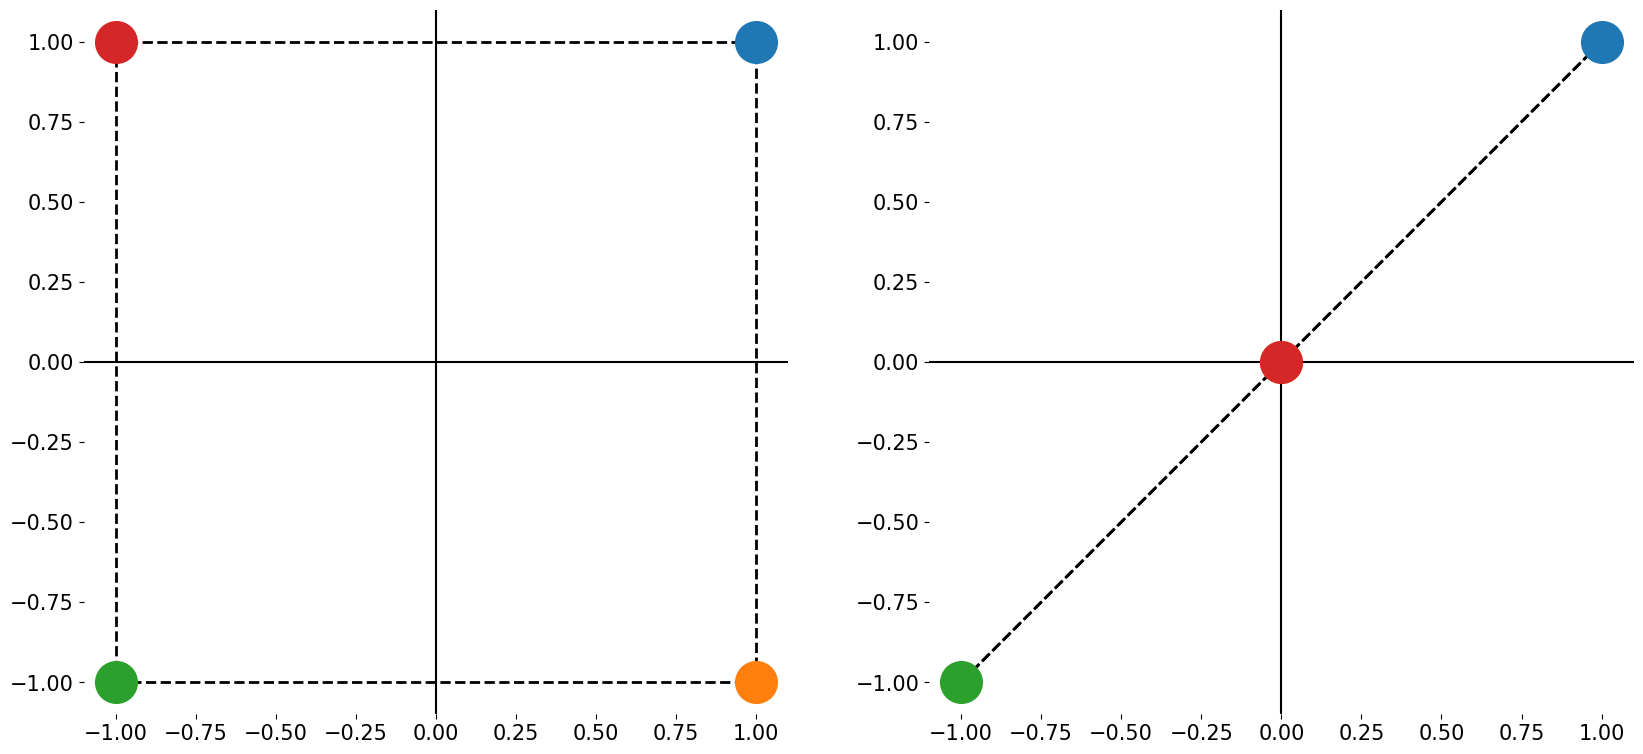

In [13]:
f = lambda x: np.array([0.5*x[0] + 0.5*x[1], 0.5*x[0] + 0.5*x[1]])
square_plot(f)

- Aplicado a $f(x_1,x_2)=(2x_1sen(\theta) + x_2cos(\theta), x_1cos(\theta) - 3x_2sen(\theta))$ con $\theta=\frac{3}{4}\pi$

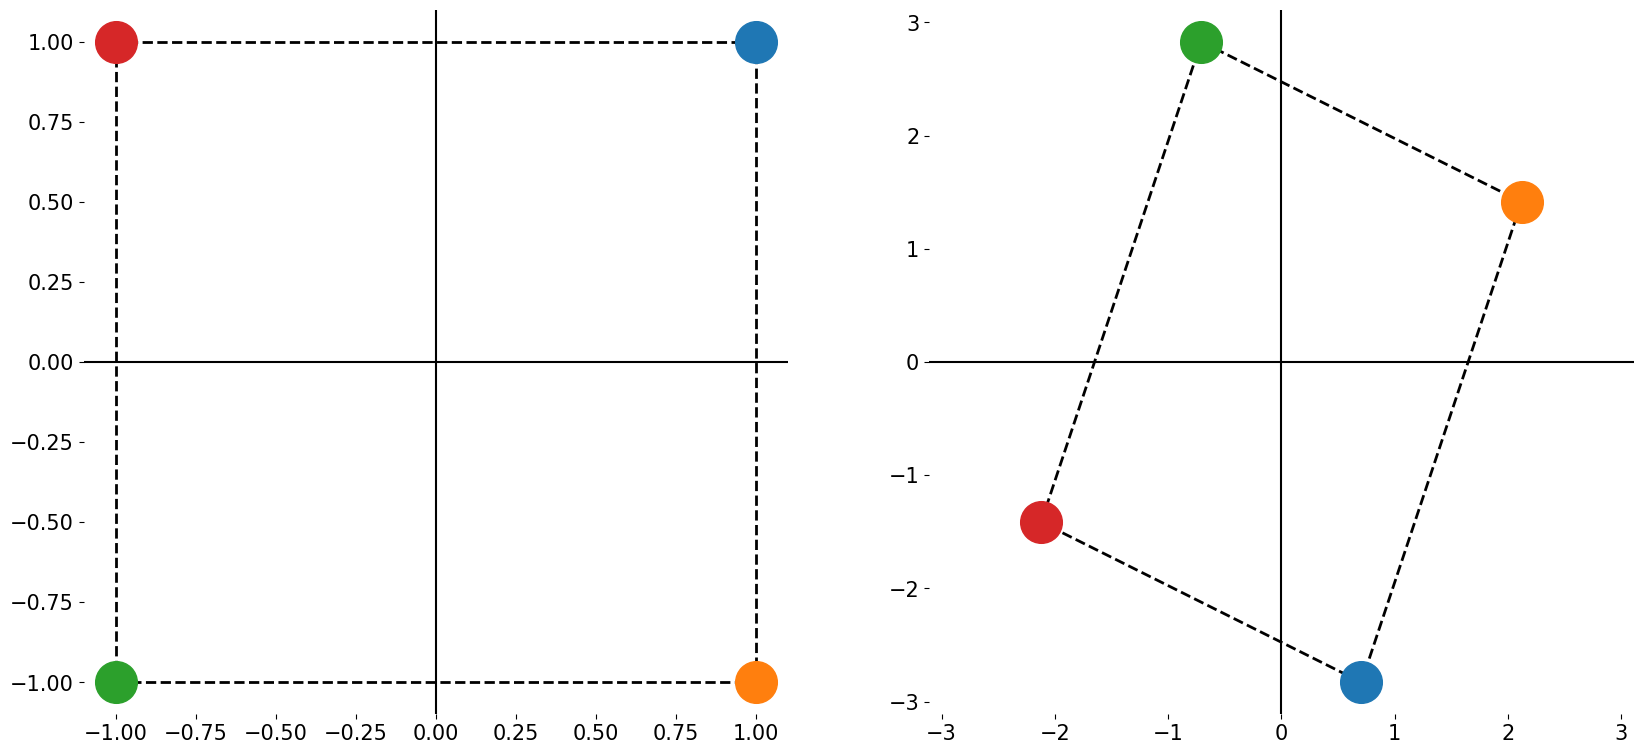

In [14]:
theta = 3/4*np.pi
f = lambda x: np.array([2*x[0]*np.sin(theta) + x[1]*np.cos(theta), x[0]*np.cos(theta) - 3*x[1]*np.sin(theta)])
square_plot(f)